In [1]:
import pandas as pd
import numpy as np

#import xgboost as xgb
import shap
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle
import warnings

import re  

import gc

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GroupShuffleSplit


/home/zahid/epic_lab/Skill_coaching/.skill_coach/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Reading in data
df = pd.read_csv(r"/home/zahid/epic_lab/Skill_coaching/rand_df.csv")

In [3]:
df.shape

(301056, 48)

In [4]:
df.head()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,590383,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,464616,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,215102,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,463719,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,486002,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [5]:
df.tail()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
301051,287360,364163929,329469143052034433,The University of Texas at Dallas,linkedin.com/school/university-of-texas-at-dallas,the university of texas at dallas,"Richardson, Texas, US",Northern America,United States,Texas,...,611310.0,"Colleges, Universities, and Professional Schools",Education Services,Higher Education and Research,Research Universities,0DC960-E,TEXAS SYSTEM UNIVERSITY OF,53612.170,0.0000,teaching assistant
301052,239935,461596273,-1185104988335526521,ValueLabs,linkedin.com/company/valuelabs,valuelabs,"Hyderabad, Telangana, India",Southern Asia,India,Telangana,...,518210.0,"Computing Infrastructure Providers, Data Proce...",Information Technology Services,Software and Technology Services,Advanced Technology and Software Engineering S...,06BZM6-E,VALUELABS SERVICES PVT LTD,23999.254,1294.1617,software engineer
301053,533449,423277159,-1012829260828153322,Instinctive Networx (P) LTD,NaN,instinctive networx p ltd,"Kolkata, West Bengal, India",Southern Asia,India,West Bengal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9920.770,2729.0073,buisness development manager
301054,573054,397247554,-1057477355379537142,KINESSO,linkedin.com/company/kinesso,kinesso,"New York, United States",Northern America,United States,New York,...,541810.0,Advertising Agencies,Information Technology Services,Digital Analytics Software,Digital Marketing and Analytics,000N2T-E,INTERPUBLIC GROUP OF COS INC,187284.610,73133.8000,manager paid search
301055,564307,676748913,8797344840678784417,AMD,linkedin.com/company/amd,amd,"Sunnyvale, CA",Northern America,United States,California,...,334413.0,Semiconductor and Related Device Manufacturing,Electronics Manufacturing,Electronics and Components Manufacturing,Semiconductor and Electronics Manufacturing,000BK7-E,ADVANCED MICRO DEVICES INC,259610.470,40872.2850,member of technical staff


In [6]:
#Dropping unnamed column
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df.head()

,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,metro_area,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,paris metropolitan area,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,dubai metropolitan area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,salt lake city metropolitan area,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,ireland nonmetropolitan area,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,dallas metropolitan area,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [8]:
df.describe()

,user_id,position_id,remote_suitability,weight,start_salary,end_salary,seniority,salary,position_number,rcid,ultimate_parent_rcid,naics_code,total_compensation,additional_compensation
count,3.010560e+05,3.010560e+05,301056.000000,301056.000000,3.009120e+05,3.009340e+05,301056.000000,3.009340e+05,301056.000000,2.187440e+05,2.187340e+05,217437.000000,3.009340e+05,3.009340e+05
mean,6.345460e+08,1.109496e+16,0.526630,1.299033,4.248987e+04,5.016435e+04,2.340983,5.016435e+04,3.580228,1.017895e+07,1.162406e+07,538628.614449,6.765672e+04,1.749237e+04
std,5.905222e+08,5.325364e+18,0.258070,0.341351,3.944229e+04,4.781991e+04,1.483672,4.781991e+04,3.621031,2.248308e+07,2.329047e+07,172718.187422,1.036005e+05,6.876127e+04
min,1.005021e+06,-9.223338e+18,0.000016,1.000000,4.044952e+02,4.837763e+02,1.000000,4.837763e+02,1.000000,2.500000e+01,4.300000e+01,111110.000000,5.797670e+02,0.000000e+00
25%,2.295508e+08,-4.596714e+18,0.390711,1.074322,1.702951e+04,1.977022e+04,1.000000,1.977022e+04,1.000000,6.391720e+05,6.893290e+05,455110.000000,2.244094e+04,1.484465e+03
50%,4.730563e+08,-7.823733e+14,0.500000,1.200051,3.191539e+04,3.679674e+04,2.000000,3.679674e+04,2.000000,1.300504e+06,1.398143e+06,525910.000000,4.246237e+04,4.277938e+03
75%,8.075275e+08,4.638228e+18,0.706399,1.412042,5.479794e+04,6.419389e+04,3.000000,6.419389e+04,5.000000,7.186992e+06,1.193840e+07,611310.000000,7.557081e+04,1.068194e+04
max,2.183867e+09,9.223359e+18,0.999984,9.472703,1.600000e+06,1.600000e+06,7.000000,1.600000e+06,133.000000,1.004165e+08,1.004174e+08,999999.000000,9.505619e+06,9.273360e+06


In [9]:
#Cleaning data but not imputing missing values
REMOVE_NA = True
KNOWN_NA_VALS = ['NIL', 'NILL', 'NULL', 'NA', '#NA', '#N/A', 'N/A','#VALUE!','#REF!','#DIV/0!','#NUM!','#NAME?','#NULL!','NAN','nan','NaN']

In [10]:
############################################################################################
# Experimental code here. Trying to replace Known values which means NULL / NA to np.nan
# Ideally this should help our analysis.
############################################################################################
for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    if len(df[df[x].isin(KNOWN_NA_VALS)]) > 0: #some instances were found with Known NA substitutions
        df.loc[ df[x].isin(KNOWN_NA_VALS), x ] = np.nan
        print("Found some known NA substitutions in {}. Will replace and try to force as numeric".format(x))
    try: #now we will try to see if the column can become numeric
        df[x] = pd.to_numeric(df[x], errors='raise')
    except ValueError as e:
        continue #Column cannot be converted to numeric. Just continue
############################################################################################

############################################################################################
# Experiment 2: If all endings are % or $ or # then we will try to strip these and check if 
#     the column can be converted as a numeric value
############################################################################################
sp_endings = ['%', '$', '#', '£', 'GBP', 'gbp', 'usd', 'USD' ,'eur', 'EUR']

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.endswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special endings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Same code as above but for string beginnings

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.startswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special startings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Now we have to deal with NA values
if REMOVE_NA == True:
    df = df.dropna(axis=0, how='all')
else:
    for x in [x for x in df.columns]:
        if df[x].dtype.kind in ('f', 'c', 'i', 'u'):
            df[x].fillna(df[x].median(),inplace=True)
    #df = df.fillna(np.nan)
    #df = df.fillna(np.nan)
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
############################################################################################

    
############################################################################################    
#We will delete any column if it is Completely np.nan
a = df.isna().sum(axis=0)
FULL_NA_COLS = [x for x in a[df.isna().sum(axis=0) == len(df)].index]
df = df.drop(FULL_NA_COLS, axis=1)

Found some known NA substitutions in title_raw. Will replace and try to force as numeric
Found some known NA substitutions in ticker. Will replace and try to force as numeric
Found some known NA substitutions in ultimate_parent_factset_name. Will replace and try to force as numeric


In [11]:
#Text components columns
df.select_dtypes(include=['object']).shape[1]

33

In [12]:
#Numerical components columns
df.select_dtypes(exclude=['object']).shape[1]

14

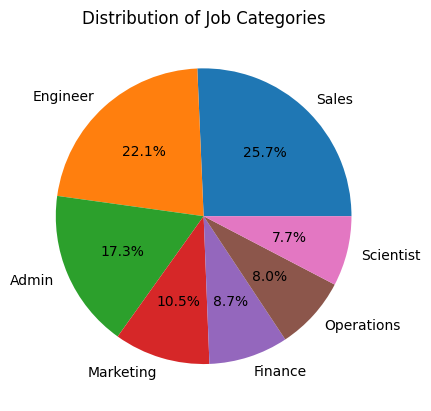

In [13]:
df['job_category'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Job Categories")
plt.ylabel("")
plt.show()

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'position_id'}>,
        <Axes: title={'center': 'remote_suitability'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'start_salary'}>,
        <Axes: title={'center': 'end_salary'}>,
        <Axes: title={'center': 'seniority'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'position_number'}>,
        <Axes: title={'center': 'rcid'}>,
        <Axes: title={'center': 'ultimate_parent_rcid'}>,
        <Axes: title={'center': 'naics_code'}>],
       [<Axes: title={'center': 'total_compensation'}>,
        <Axes: title={'center': 'additional_compensation'}>, <Axes: >,
        <Axes: >]], dtype=object)

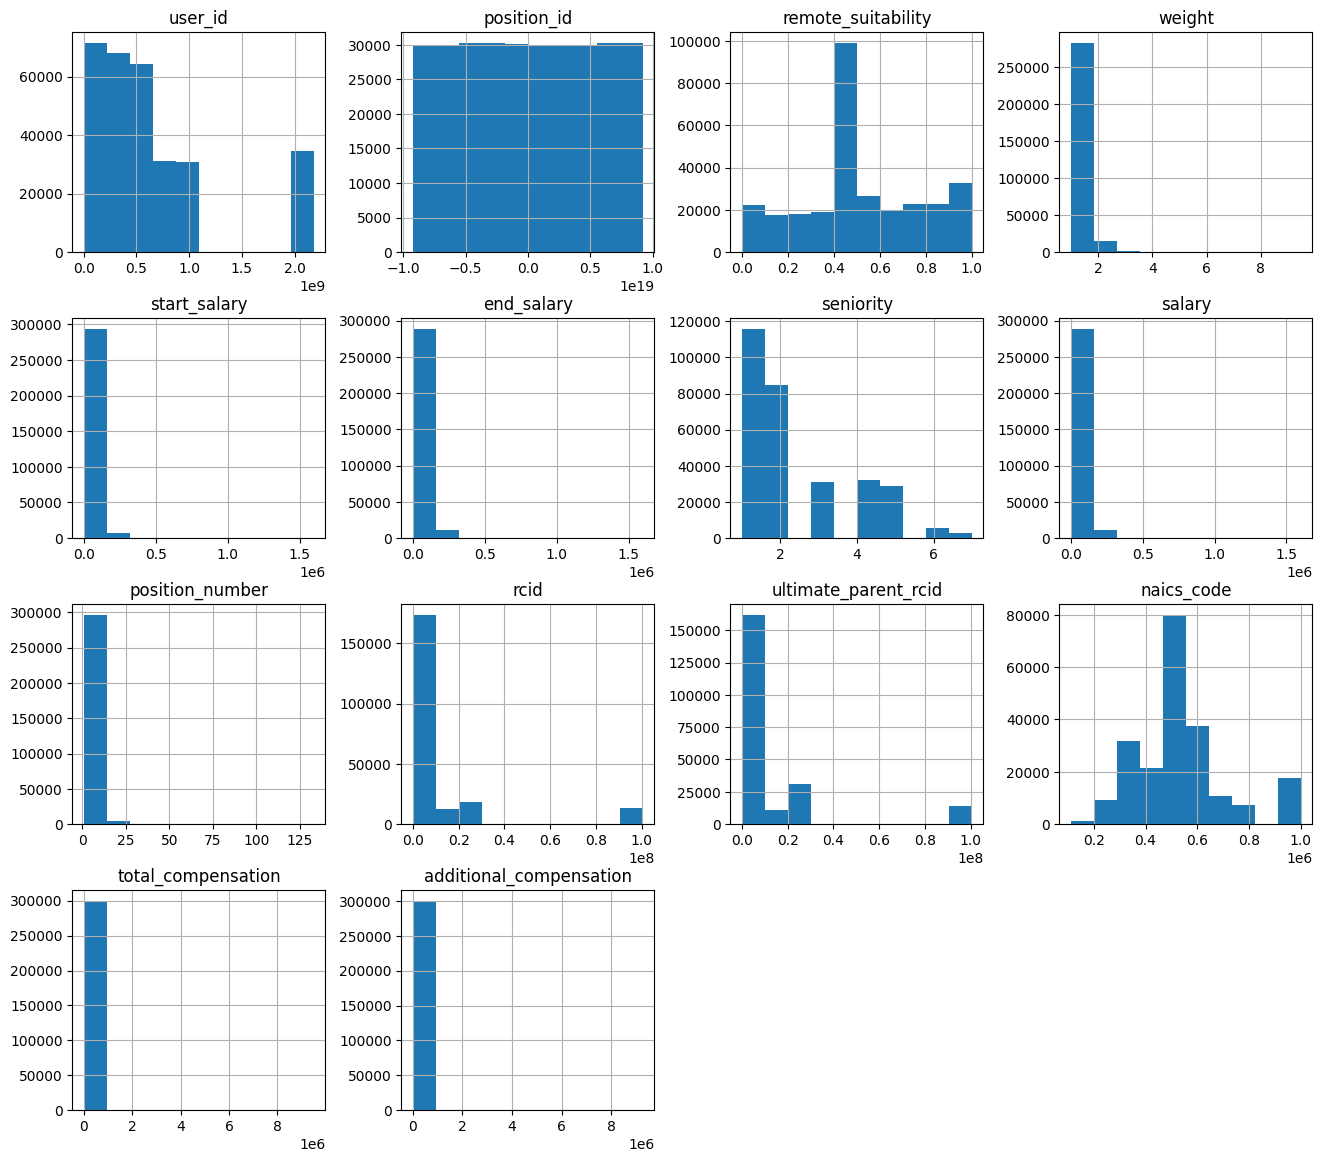

In [14]:
#Plotting numerical data distribuion
df.hist(figsize=(16,14))

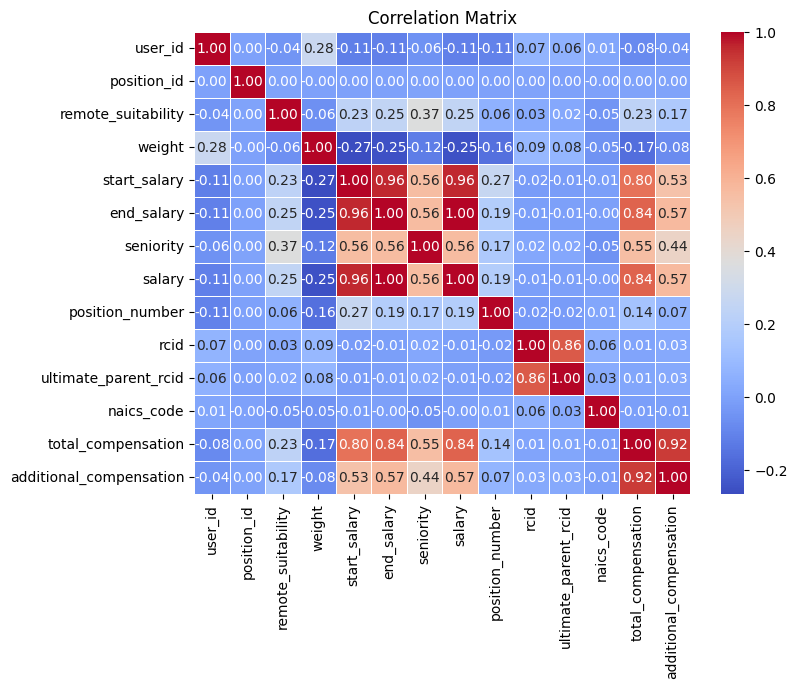

20194

In [15]:
#Seeing which numerical features are correlated so not all are included in the training model

df1 = df.select_dtypes(exclude=['object'])
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

del(df1)
gc.collect()

In [16]:
df1 = df[['job_category', 'role_k50', 'rics_k50', 'naics_description', 'country', 'remote_suitability','total_compensation', 'start_salary', 'seniority']]

In [17]:
for i in np.arange(0,len(df1.columns)):
    val_cnt = df1[df1.columns[i]].value_counts()
    miss_vals = df1[df1.columns[i]].isna().sum()
    print("For feature {} we have the below stats:".format(df1.columns[i]))
    print("Value counts length {}".format(len(val_cnt)))
    print("Missing Values are {}\n".format(miss_vals))

del(df1)
gc.collect()

For feature job_category we have the below stats:
Value counts length 7
Missing Values are 0

For feature role_k50 we have the below stats:
Value counts length 50
Missing Values are 0

For feature rics_k50 we have the below stats:
Value counts length 50
Missing Values are 82336

For feature naics_description we have the below stats:
Value counts length 1013
Missing Values are 83619

For feature country we have the below stats:
Value counts length 224
Missing Values are 0

For feature remote_suitability we have the below stats:
Value counts length 25879
Missing Values are 0

For feature total_compensation we have the below stats:
Value counts length 299734
Missing Values are 122

For feature start_salary we have the below stats:
Value counts length 300877
Missing Values are 144

For feature seniority we have the below stats:
Value counts length 7
Missing Values are 0



0

In [18]:
df[['user_id','start_salary']].value_counts(subset=['user_id'])

user_id   
2089061639    57
706483222     56
12990526      34
237526202     33
80076782      29
              ..
450098547      1
450089308      1
450076578      1
450068367      1
450211267      1
Name: count, Length: 145356, dtype: int64

Analysis date (latest date in data): 2025-02-01

Forcing numeric columns to numeric type (errors='coerce')...
Total NaNs in numeric features after coercion:
tenure_days            0
total_compensation    90
seniority              0
remote_suitability     0
dtype: int64
Cleaning bad strings from categorical columns...
Categorical cleaning complete.
Data split.
Total unique users in training: 80324
Total unique users in test: 20081

Training set shape: (201575, 8)
Test set shape: (50515, 8)

Total features after one-hot encoding: 271

Training RandomForestClassifier...
Model training complete.

--- RandomForest Model Evaluation Results ---

Classification Report:
                 precision    recall  f1-score   support

Not Churned (0)       0.71      0.53      0.61     14642
    Churned (1)       0.83      0.91      0.87     35873

       accuracy                           0.80     50515
      macro avg       0.77      0.72      0.74     50515
   weighted avg       0.79      0.80      0

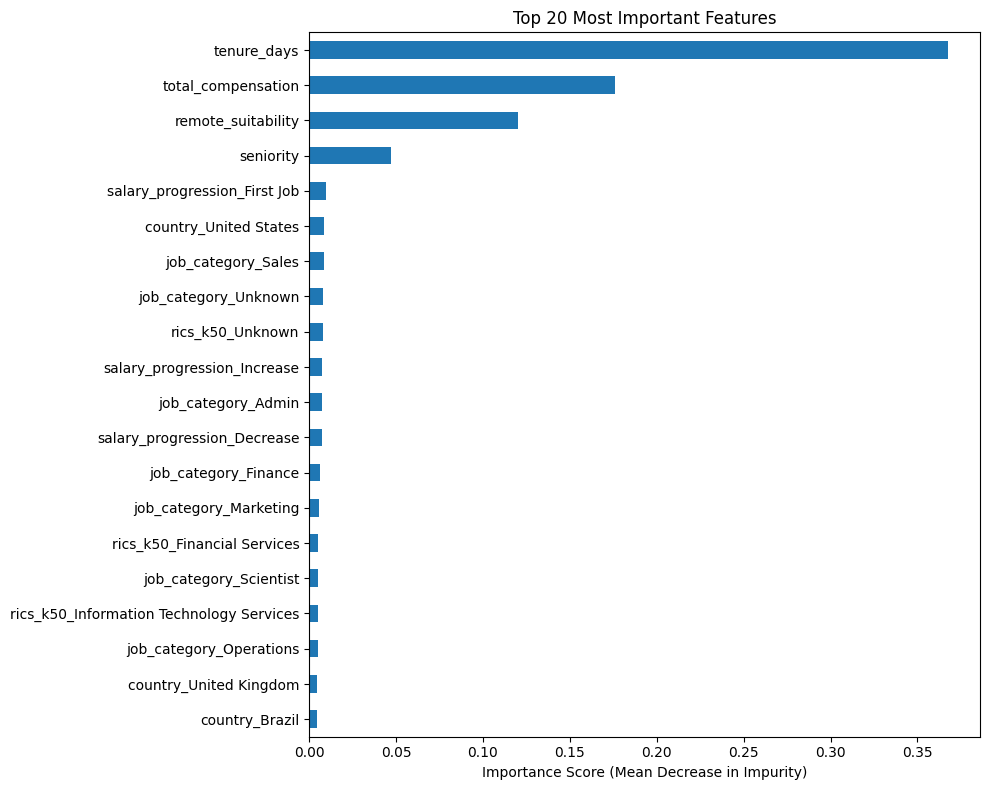

In [19]:
# Suppress warnings
warnings.filterwarnings('ignore')


MODEL_FILENAME = 'churn_model.pkl'

try:

    # Computing churn
    df['churn'] = np.where(df['enddate'].isnull(), 0, 1)
    df['startdate'] = pd.to_datetime(df['startdate'], errors='coerce')
    df['enddate'] = pd.to_datetime(df['enddate'], errors='coerce')
    df = df.dropna(subset=['startdate'])
    
    analysis_date = max(df['startdate'].max(), df['enddate'].max())
    print(f"Analysis date (latest date in data): {analysis_date.date()}")

    df['tenure_days'] = np.where(
        df['churn'] == 1,
        (df['enddate'] - df['startdate']).dt.days,
        (analysis_date - df['startdate']).dt.days
    )
    df = df[df['tenure_days'] >= 0] # Clean edge cases

    # Computing salary progression
    
    df = df.sort_values(by=['user_id', 'startdate'])
    df['previous_salary'] = df.groupby('user_id')['start_salary'].shift()
    df['percent_change'] = (df['start_salary'] - df['previous_salary']) / df['previous_salary']
    
    def map_salary_progression(change):
        if pd.isna(change):
            return 'First Job'
        elif change > 0.05:
            return 'Increase'
        elif change < -0.05:
            return 'Decrease'
        else:
            return 'Stable'
            
    df['salary_progression'] = df['percent_change'].apply(map_salary_progression)
    
    groups = df['user_id']
    

    #FEATURE SELECTION
    numeric_features = ['tenure_days', 'total_compensation', 'seniority', 'remote_suitability']
    categorical_features = ['job_category', 'country', 'rics_k50','salary_progression']
    target = 'churn'

    # Data Cleaning Step 1: Numeric
    print("\nForcing numeric columns to numeric type (errors='coerce')...")
    for col in numeric_features:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Total NaNs in numeric features after coercion:\n{df[numeric_features].isnull().sum()}")

    # Data Cleaning Step 2: Categorical
    print("Cleaning bad strings from categorical columns...")
    
    def clean_categorical(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip()
        if '[' in s or ']' in s or 'E' in s:
            return np.nan  # Nullify if found
        return s

    for col in categorical_features:
        if col in df.columns:
            df[col] = df[col].apply(clean_categorical)
    
    print("Categorical cleaning complete.")
    
    X = df[numeric_features + categorical_features]
    y = df[target]

    # Preprocessing Pipeline
    numeric_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

    numeric_transformer = Pipeline(steps=[
        ('imputer', numeric_imputer),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', categorical_imputer),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='drop'
    )

    #Data Split & Preprocessing
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    train_idx, test_idx = next(gss.split(X, y, groups=groups))
    
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_train_groups = groups.iloc[train_idx]
    
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    
    print(f"Data split.")
    print(f"Total unique users in training: {X_train_groups.nunique()}")
    print(f"Total unique users in test: {groups.iloc[test_idx].nunique()}")
    
    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    try:
        ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
        all_feature_names = numeric_features + list(ohe_feature_names)
        print(f"\nTotal features after one-hot encoding: {len(all_feature_names)}")
    except Exception as e:
        print(f"Could not get all feature names: {e}")
        all_feature_names = None

    # Model Training
    print("\nTraining RandomForestClassifier...")
    
    # Use class_weight='balanced' to help with imbalance
    final_model = RandomForestClassifier(
        random_state=42, 
        n_estimators=100, 
        class_weight='balanced',
        n_jobs=-1  # Use all available cores
    )
    
    final_model.fit(X_train_processed, y_train)
    print("Model training complete.")

    # --- Evaluation ---
    y_pred = final_model.predict(X_test_processed)
    y_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]
    print("\n--- RandomForest Model Evaluation Results ---")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Churned (0)', 'Churned (1)']))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Save Model 
    print(f"\nSaving model to '{MODEL_FILENAME}'...")
    with open(MODEL_FILENAME, 'wb') as f:
        model_payload = {'preprocessor': preprocessor, 'model': final_model}
        pickle.dump(model_payload, f)
    print("Model saved successfully.")

    # Feature Importance Analysis
    print("\nGenerating Feature Importance plot...")
    
    if all_feature_names:
        # Get importances from the trained model
        importances = final_model.feature_importances_
        
        # Create a pandas Series
        importance_series = pd.Series(importances, index=all_feature_names)
        
        # Sort and print the top 20
        top_20_features = importance_series.sort_values(ascending=False).head(20)
        print("\nTop 20 Most Important Features:")
        print(top_20_features)
        
        # Create and Save a Bar Plot
        plt.figure(figsize=(10, 8))
        top_20_features.sort_values(ascending=True).plot(kind='barh')
        plt.title('Top 20 Most Important Features')
        plt.xlabel('Importance Score (Mean Decrease in Impurity)')
        plt.tight_layout()
        plot_filename = 'feature_importance_plot.png'
        plt.savefig(plot_filename)
        print(f"Feature importance plot saved to '{plot_filename}'")
        
    else:
        print("Could not generate feature importance plot (feature names are missing).")


except Exception as e:
    print(f"An error occurred: {e}")

PDP plots saved to 'pdp_plots.png'


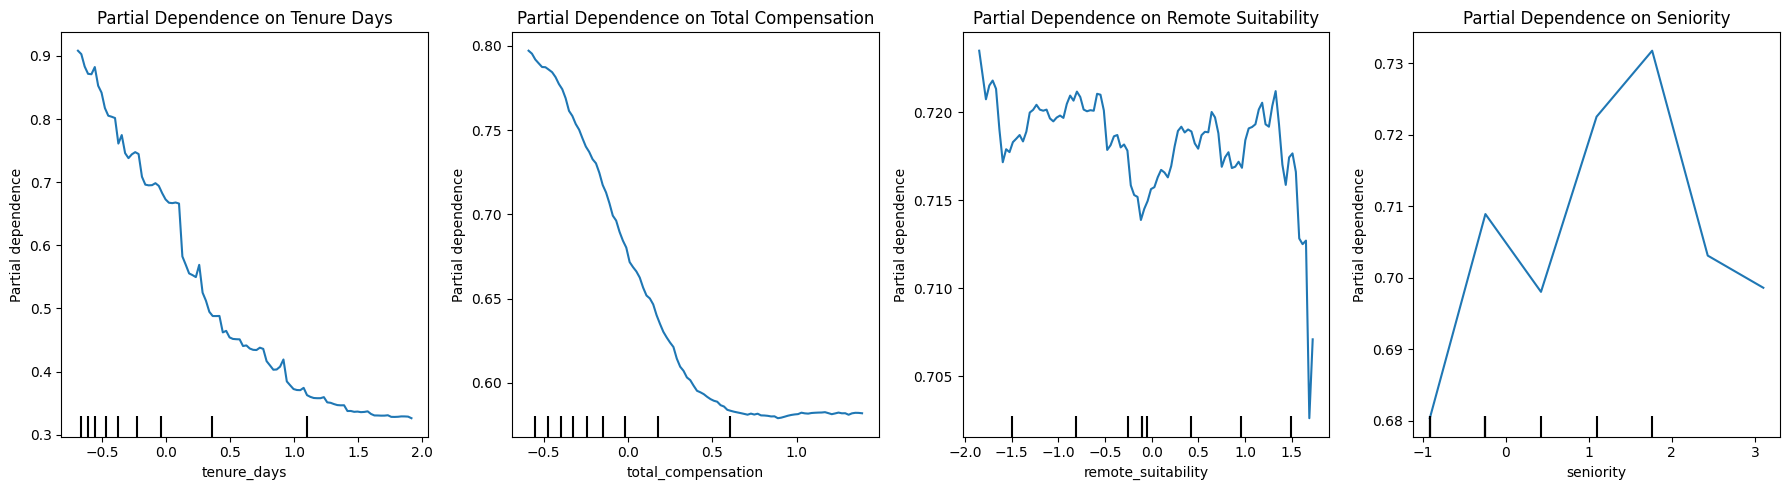

In [20]:
try:
    # Check if variables exist
    if 'final_model' in locals() and 'X_test_processed' in locals() and 'all_feature_names' in locals():
        
        # Size of plots
        fig, ax = plt.subplots(ncols=4, figsize=(18, 5))

        #Plot 1: PDP for tenure_days
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['tenure_days'],  
            feature_names=all_feature_names, 
            target=1,
            ax=ax[0]
        )
        ax[0].set_title('Partial Dependence on Tenure Days')
        ax[0].set_ylabel('Churn Probability')

        #Plot 2: PDP for total_compensation
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['total_compensation'],
            feature_names=all_feature_names,
            target=1,
            ax=ax[1]
        )
        ax[1].set_title('Partial Dependence on Total Compensation')
        ax[1].set_ylabel('Churn Probability')

        #Plot 3: PDP for remote_suitability
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['remote_suitability'],
            feature_names=all_feature_names,
            target=1,
            ax=ax[2]
        )
        ax[2].set_title('Partial Dependence on Remote Suitability')
        ax[2].set_ylabel('Churn Probability')

        #Plot 4: PDP for seniority
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['seniority'],
            feature_names=all_feature_names,
            target=1,
            ax=ax[3]
        )
        ax[3].set_title('Partial Dependence on Seniority')
        ax[3].set_ylabel('Churn Probability')

        #Save figures
        plt.tight_layout()
        pdp_plot_filename = 'pdp_plots.png'
        plt.savefig(pdp_plot_filename)
        print(f"PDP plots saved to '{pdp_plot_filename}'")
    
    else:
        print("Error: Could not generate PDP plots.")
        print("Make sure 'final_model', 'X_test_processed', and 'all_feature_names' exist.")

except Exception as e:
    print(f"An error occurred during PDP generation: {e}")

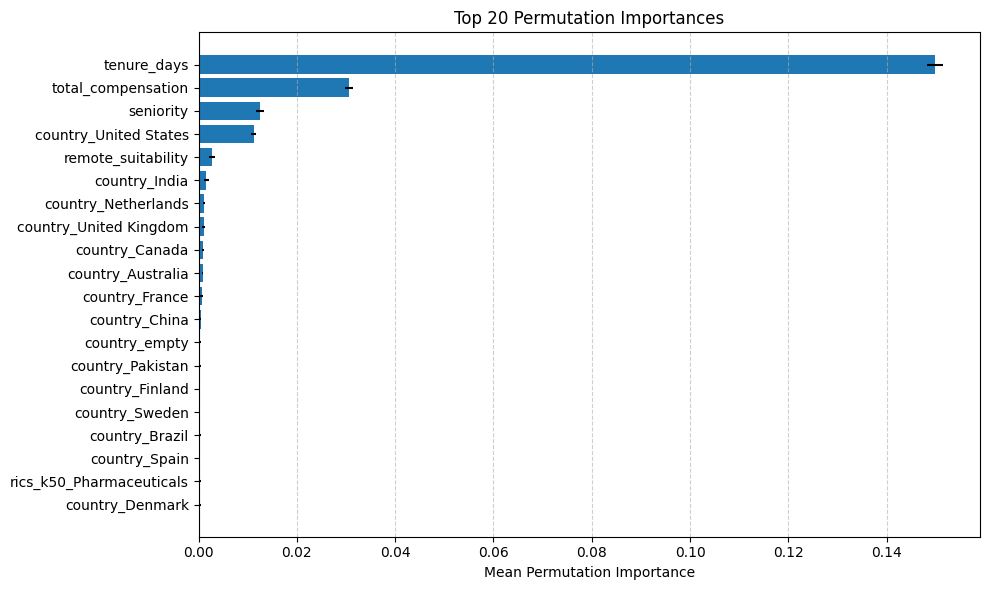

In [22]:
# Compute feature importance (using permutation)
result = permutation_importance(
    final_model, X_test_processed, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
# Sort indices by mean importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Feature labels
if 'all_feature_names' in locals() and all_feature_names is not None:
    feature_labels = np.array(all_feature_names)
else:
    feature_labels = np.array([f"Feature_{i}" for i in range(len(sorted_idx))])

# Select top N features
top_n = 20
top_idx = sorted_idx[:top_n]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    feature_labels[top_idx][::-1],   # reverse for descending order
    result.importances_mean[top_idx][::-1],
    xerr=result.importances_std[top_idx][::-1],
    align='center'
)
plt.xlabel("Mean Permutation Importance")
plt.title(f"Top {top_n} Permutation Importances")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

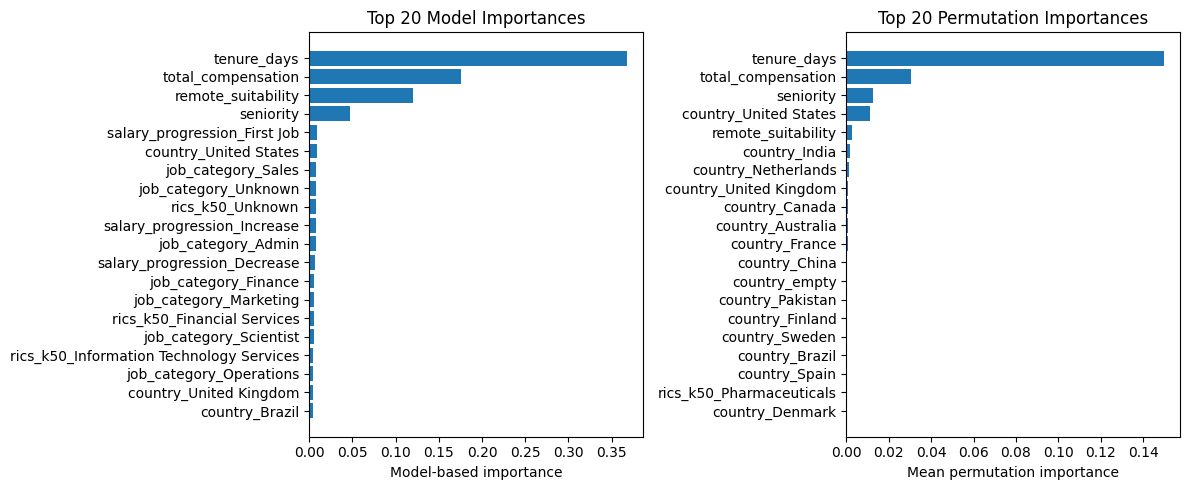

In [23]:
# Model-based importances (if supported)
model_importances = final_model.feature_importances_
sorted_idx = np.argsort(model_importances)[::-1][:20]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(np.array(all_feature_names)[sorted_idx][::-1], model_importances[sorted_idx][::-1])
plt.title("Top 20 Model Importances")
plt.xlabel("Model-based importance")

# Permutation importances
perm_sorted_idx = result.importances_mean.argsort()[::-1][:20]
plt.subplot(1, 2, 2)
plt.barh(np.array(all_feature_names)[perm_sorted_idx][::-1], result.importances_mean[perm_sorted_idx][::-1])
plt.title("Top 20 Permutation Importances")
plt.xlabel("Mean permutation importance")

plt.tight_layout()
plt.show()

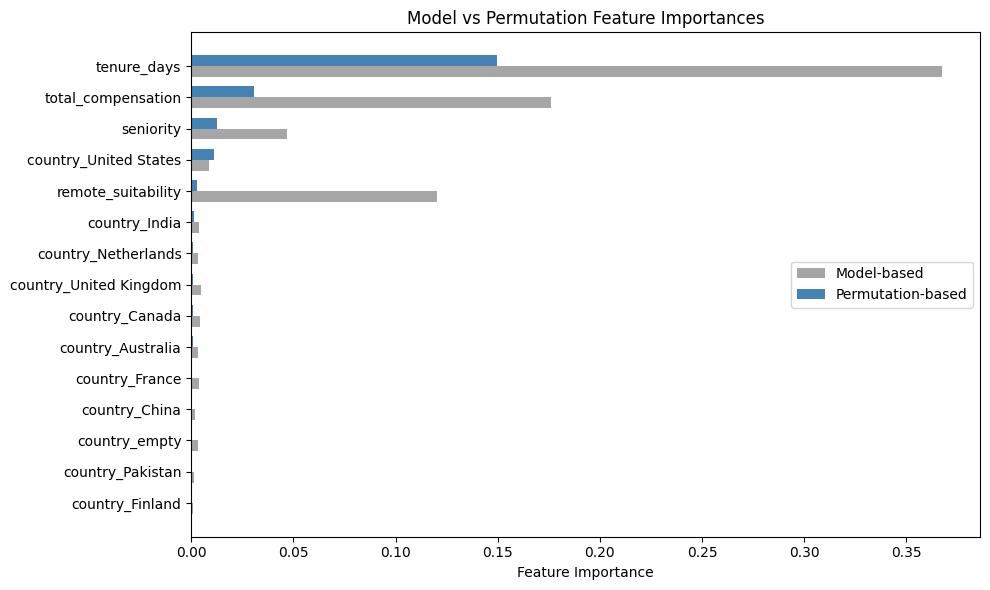

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example arrays: replace with real data
model_imp = final_model.feature_importances_
perm_imp = result.importances_mean
features = np.array(all_feature_names)

# Sort by model importance or permutation importance
sorted_idx = np.argsort(perm_imp)[-15:]

plt.figure(figsize=(10, 6))
width = 0.35
y = np.arange(len(sorted_idx))

plt.barh(y - width/2, model_imp[sorted_idx], height=width, label='Model-based', color='gray', alpha=0.7)
plt.barh(y + width/2, perm_imp[sorted_idx], height=width, label='Permutation-based', color='steelblue')

plt.yticks(y, features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Model vs Permutation Feature Importances')
plt.legend(loc="right")
plt.tight_layout()
plt.show()


In [ ]:
assert True == False

AssertionError: 

In [ ]:
with open(MODEL_FILENAME, "rb") as file:
    final_model = pickle.load(file)

In [ ]:
final_model = final_model['model']